In [1]:
import numpy as np
import pandas as pd
# Load the .npy file
# data1 = np.load('H1_chr1.npy')
# data2 = np.load('H1_chr1_IZIndices.npy')
# Print the loaded data


In [2]:
# pd.DataFrame(data2)

In [3]:
# control data from pipeline. COnsists of chromosome, start, end, and RT

ctrl = pd.read_csv('HepG2_R1_hg38_50kb_qNormSmoothed300span_10kb.bedgraph', sep='\t', header=None)
ctrl

,0,1,2,3
0,chr1,630000,640000,2.280642
1,chr1,640000,650000,2.435197
2,chr1,650000,660000,2.580551
3,chr1,660000,670000,2.716948
4,chr1,670000,680000,2.844632
...,...,...,...,...
284359,chrX,155600000,155610000,-0.552282
284360,chrX,155610000,155620000,-0.488470
284361,chrX,155620000,155630000,-0.452465
284362,chrX,155630000,155640000,-0.444302


In [4]:
#combined pseudo RT, combining G1-S2 and S3-G2 for E and L.

pseudo = pd.read_csv('RT_50000_qNorm_Smoothed_10Kb2025-07-22.txt', sep='\t')

In [5]:
pseudo

,Chromosome,Position,HepG2-R1_1_50000_hg38_log2RT.bgqNormSmoothed,rep1_1_50000_hg38_log2RT.bgqNormSmoothed,rep2_1_50000_hg38_log2RT.bgqNormSmoothed,rep3_1_50000_hg38_log2RT.bgqNormSmoothed
0,chr1,100000,3.645340,1.113056,4.507735,0.664891
1,chr1,110000,3.570236,1.111494,4.498887,0.795316
2,chr1,120000,3.492760,1.110484,4.490629,0.917794
3,chr1,130000,3.412885,1.109971,4.482862,1.032319
4,chr1,140000,3.330586,1.109904,4.475486,1.138889
...,...,...,...,...,...,...
285899,chrX,155600000,-0.733254,-0.828981,-1.791869,-0.335449
285900,chrX,155610000,-0.574970,-0.771850,-1.990674,-0.305215
285901,chrX,155620000,-0.402954,-0.703569,-2.182350,-0.272168
285902,chrX,155630000,-0.217206,-0.624138,-2.366920,-0.236306


<Axes: xlabel='Position', ylabel='HepG2-R1_1_50000_hg38_log2RT.bgqNormSmoothed'>

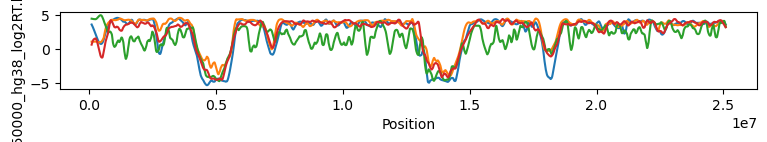

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plot RT of region of chromosome

plt.figure(figsize=(9,1))
#sns.lineplot(data=ctrl[ctrl[0] =='chr1'][0:5000], x = 1, y = 3)
#sns.lineplot(data=ctrl[pseudo[0]=='chr1'][0:2500], x = '1', y = '3')
sns.lineplot(data=pseudo[pseudo['Chromosome']=='chr1'][0:2500], x = 'Position', y = 'HepG2-R1_1_50000_hg38_log2RT.bgqNormSmoothed')
sns.lineplot(data=pseudo[pseudo['Chromosome']=='chr1'][0:2500], x = 'Position', y = 'rep1_1_50000_hg38_log2RT.bgqNormSmoothed')
sns.lineplot(data=pseudo[pseudo['Chromosome']=='chr1'][0:2500], x = 'Position', y = 'rep2_1_50000_hg38_log2RT.bgqNormSmoothed')
sns.lineplot(data=pseudo[pseudo['Chromosome']=='chr1'][0:2500], x = 'Position', y = 'rep3_1_50000_hg38_log2RT.bgqNormSmoothed')

In [8]:
# create DF of all RPKM data for PARTAGE Datasets
import os
bg_df = False
for file in os.listdir('./bg/'):
    if type(bg_df)==type(False):
        bg_df = pd.read_csv('./bg/'+file, sep='\t', header=None)
        bg_df.columns = ['chr', 'start', 'end', file]
    else:
        bg_df[file]=pd.read_csv('./bg/'+file, sep='\t', header=None)[3]

In [9]:
bg_df.columns

Index(['chr', 'start', 'end', 'G1-1_1_E_50000_hg38_rpkm.bg',
       'G1-1_1_L_50000_hg38_rpkm.bg', 'G1-2_1_E_50000_hg38_rpkm.bg',
       'G1-2_1_L_50000_hg38_rpkm.bg', 'G1-3_1_E_50000_hg38_rpkm.bg',
       'G1-3_1_L_50000_hg38_rpkm.bg', 'G2-1_1_E_50000_hg38_rpkm.bg',
       'G2-1_1_L_50000_hg38_rpkm.bg', 'G2-2_1_E_50000_hg38_rpkm.bg',
       'G2-2_1_L_50000_hg38_rpkm.bg', 'G2-3_1_E_50000_hg38_rpkm.bg',
       'G2-3_1_L_50000_hg38_rpkm.bg', 'S1-1_1_E_50000_hg38_rpkm.bg',
       'S1-1_1_L_50000_hg38_rpkm.bg', 'S1-2_1_E_50000_hg38_rpkm.bg',
       'S1-2_1_L_50000_hg38_rpkm.bg', 'S1-3_1_E_50000_hg38_rpkm.bg',
       'S1-3_1_L_50000_hg38_rpkm.bg', 'S2-1_1_E_50000_hg38_rpkm.bg',
       'S2-1_1_L_50000_hg38_rpkm.bg', 'S2-2_1_E_50000_hg38_rpkm.bg',
       'S2-2_1_L_50000_hg38_rpkm.bg', 'S2-3_1_E_50000_hg38_rpkm.bg',
       'S2-3_1_L_50000_hg38_rpkm.bg', 'S3-1_1_E_50000_hg38_rpkm.bg',
       'S3-1_1_L_50000_hg38_rpkm.bg', 'S3-2_1_E_50000_hg38_rpkm.bg',
       'S3-2_1_L_50000_hg38_rpkm.bg', 'S3-

In [10]:
#remove duplicates

bg_df = bg_df[['chr', 'start', 'end', 
'G1-1_1_E_50000_hg38_rpkm.bg',
'G1-2_1_E_50000_hg38_rpkm.bg',
'G1-3_1_E_50000_hg38_rpkm.bg',
'S1-1_1_E_50000_hg38_rpkm.bg', 
'S1-2_1_E_50000_hg38_rpkm.bg',
'S1-3_1_E_50000_hg38_rpkm.bg',
'S2-1_1_E_50000_hg38_rpkm.bg',
'S2-2_1_E_50000_hg38_rpkm.bg', 
'S2-3_1_E_50000_hg38_rpkm.bg',
'S3-1_1_E_50000_hg38_rpkm.bg', 
'S3-2_1_E_50000_hg38_rpkm.bg',
'S3-3_1_E_50000_hg38_rpkm.bg', 
'S4-1_1_E_50000_hg38_rpkm.bg',
'S4-2_1_E_50000_hg38_rpkm.bg', 
'S4-3_1_E_50000_hg38_rpkm.bg',
]]

#separate samples

cols = ['chr', 'start', 'end', 'G1', 'S1', 'S2', 'S3', 'S4']
bg_df_1 = bg_df[['chr', 'start', 'end', 
'G1-1_1_E_50000_hg38_rpkm.bg',

'S1-1_1_E_50000_hg38_rpkm.bg', 

'S2-1_1_E_50000_hg38_rpkm.bg',

'S3-1_1_E_50000_hg38_rpkm.bg', 

'S4-1_1_E_50000_hg38_rpkm.bg',

 
]]
bg_df_1.columns = cols
bg_df_2 = bg_df[['chr', 'start', 'end', 

'G1-2_1_E_50000_hg38_rpkm.bg',

'S1-2_1_E_50000_hg38_rpkm.bg',

'S2-2_1_E_50000_hg38_rpkm.bg', 

'S3-2_1_E_50000_hg38_rpkm.bg',

'S4-2_1_E_50000_hg38_rpkm.bg', 


]]
bg_df_2.columns = cols
bg_df_3 = bg_df[['chr', 'start', 'end', 

'G1-3_1_E_50000_hg38_rpkm.bg',

'S1-3_1_E_50000_hg38_rpkm.bg',

'S2-3_1_E_50000_hg38_rpkm.bg',

'S3-3_1_E_50000_hg38_rpkm.bg', 

'S4-3_1_E_50000_hg38_rpkm.bg',

]]
bg_df_3.columns = cols

In [11]:
bg_df_corr = bg_df[[
'G1-1_1_E_50000_hg38_rpkm.bg',
'G1-2_1_E_50000_hg38_rpkm.bg',
'G1-3_1_E_50000_hg38_rpkm.bg',
'S1-1_1_E_50000_hg38_rpkm.bg', 
'S1-2_1_E_50000_hg38_rpkm.bg',
'S1-3_1_E_50000_hg38_rpkm.bg',
'S2-1_1_E_50000_hg38_rpkm.bg',
'S2-2_1_E_50000_hg38_rpkm.bg', 
'S2-3_1_E_50000_hg38_rpkm.bg',
'S3-1_1_E_50000_hg38_rpkm.bg', 
'S3-2_1_E_50000_hg38_rpkm.bg',
'S3-3_1_E_50000_hg38_rpkm.bg', 
'S4-1_1_E_50000_hg38_rpkm.bg',
'S4-2_1_E_50000_hg38_rpkm.bg', 
'S4-3_1_E_50000_hg38_rpkm.bg']]

#rename correlation dataframe columns to shorter version
bg_df_corr.columns = ['G1-1',
'G1-2',
'G1-3',
'S1-1', 
'S1-2',
'S1-3',
'S2-1',
'S2-2', 
'S2-3',
'S3-1', 
'S3-2',
'S3-3', 
'S4-1',
'S4-2', 
'S4-3']

In [12]:
#calculate pearson correlation
corr_matrix = bg_df_corr.corr()

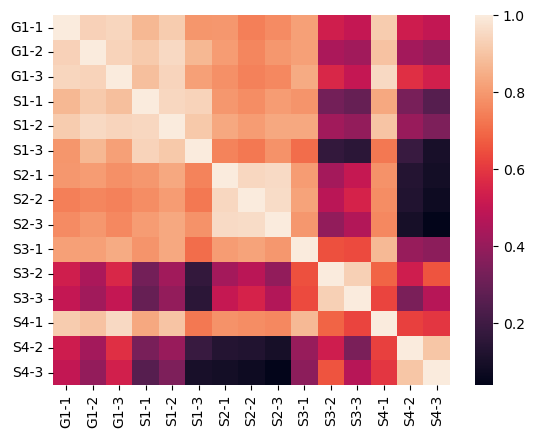

In [13]:
#Plot correlation matrix
sns.heatmap(corr_matrix)
plt.savefig('rt_corr_matrix_partage.png')
plt.savefig('rt_corr_matrix_partage.svg')
plt.savefig('rt_corr_matrix_partage.pdf')

In [14]:
#create dataframe to get the average values for each of the timepoints across samples

bg_df_avg = pd.DataFrame()
bg_df_avg['chr']=bg_df['chr']
bg_df_avg['start']=bg_df['start']
bg_df_avg['end']=bg_df['end']
bg_df_avg['G1']=np.mean(bg_df[['G1-1_1_E_50000_hg38_rpkm.bg',
'G1-2_1_E_50000_hg38_rpkm.bg',
'G1-3_1_E_50000_hg38_rpkm.bg',]], axis=1)

bg_df_avg['S1']=np.mean(bg_df[['S1-1_1_E_50000_hg38_rpkm.bg',
'S1-2_1_E_50000_hg38_rpkm.bg', 
'S1-3_1_E_50000_hg38_rpkm.bg',]], axis=1)
bg_df_avg['S2']=np.mean(bg_df[['S2-1_1_E_50000_hg38_rpkm.bg', 
'S2-2_1_E_50000_hg38_rpkm.bg',
'S2-3_1_E_50000_hg38_rpkm.bg', ]], axis=1)
bg_df_avg['S3']=np.mean(bg_df[['S3-1_1_E_50000_hg38_rpkm.bg',
'S3-2_1_E_50000_hg38_rpkm.bg', 
'S3-3_1_E_50000_hg38_rpkm.bg',]], axis=1)
bg_df_avg['S4']=np.mean(bg_df[['S4-1_1_E_50000_hg38_rpkm.bg', 
'S4-2_1_E_50000_hg38_rpkm.bg',
'S4-3_1_E_50000_hg38_rpkm.bg']], axis=1)



In [15]:
#for this plotting, only plot the first sample. Variables below are named to assume that the average df is being used
bg_df_avg = bg_df_1
bg_df_avg

,chr,start,end,G1,S1,S2,S3,S4
0,chr1,0,50000,0.000000,0.004248,0.010786,0.010122,0.003985
1,chr1,50000,100000,0.003706,0.008495,0.000000,0.010122,0.001993
2,chr1,100000,150000,0.003706,0.004248,0.007190,0.000000,0.003985
3,chr1,150000,200000,0.040765,0.033980,0.025167,0.000000,0.019926
4,chr1,200000,250000,0.003706,0.000000,0.003595,0.010122,0.001993
...,...,...,...,...,...,...,...,...
62121,KI270755.1,0,36723,0.000000,0.000000,0.000000,0.000000,0.000000
62122,KI270756.1,0,50000,0.000000,0.000000,0.000000,0.000000,0.000000
62123,KI270756.1,50000,79590,0.000000,0.000000,0.000000,0.000000,0.000000
62124,KI270757.1,0,50000,0.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
chr_dict = {}
for value in range(1,23):
    chr_dict[value] = bg_df_avg[(bg_df_avg['chr']).astype(str)==('chr'+str(value))]
    

In [17]:
#calculate the log2 between G1 and the rest of the timepoints

chr_dict_log2 = {}
for value in range(1,23):
    tempdf = pd.DataFrame()
    
    tempdf['chr']=chr_dict[value]['chr']
    tempdf['start']=chr_dict[value]['start']
    tempdf['end']=chr_dict[value]['end']
    for value2 in ['G1','S1', 'S2', 'S3', 'S4']:
        tempdf[value2] = np.log2((chr_dict[value][value2]+1)/(chr_dict[value]['G1']+1))
        tempdf.loc[tempdf[value2]<0, value2] = 0
    chr_dict_log2[value] = tempdf
    


In [18]:
chr_dict_log2[1]

,chr,start,end,G1,S1,S2,S3,S4
0,chr1,0,50000,0.0,0.006115,0.015477,0.014530,0.005738
1,chr1,50000,100000,0.0,0.006867,0.000000,0.009193,0.000000
2,chr1,100000,150000,0.0,0.000778,0.005000,0.000000,0.000401
3,chr1,150000,200000,0.0,0.000000,0.000000,0.000000,0.000000
4,chr1,200000,250000,0.0,0.000000,0.000000,0.009193,0.000000
...,...,...,...,...,...,...,...,...
4975,chr1,248750000,248800000,0.0,0.060267,0.249188,0.000000,0.000000
4976,chr1,248800000,248850000,0.0,0.000000,0.130357,0.000000,0.000000
4977,chr1,248850000,248900000,0.0,0.081505,0.196524,0.066159,0.103102
4978,chr1,248900000,248950000,0.0,0.000000,0.145174,0.000000,0.000000


<Axes: xlabel='start', ylabel='S1'>

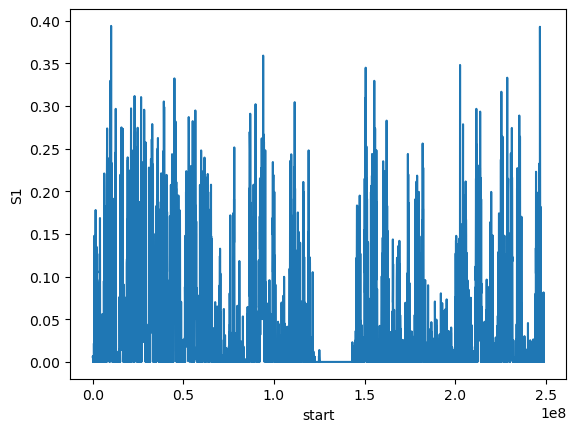

In [19]:
import seaborn as sns
sns.lineplot(chr_dict_log2[1], x='start', y='S1')

In [21]:
#from: https://github.com/oliviacamel/High-Resolution-RepliSeq

#gaussian smoothing not used in final calculations.


# def gausssmoothing (rawcoveragematrix,shape=(3,3),sigma=1):
#     def gaussfilt2D(shape=shape,sigma=sigma):
#         m,n=[(edge-1)/2 for edge in shape]
#         y,x = np.ogrid[-m:m+1,-n:n+1]
#         array=np.exp(-(x*x+y*y)/(2*sigma*sigma))
#         array[array<np.finfo(array.dtype).eps * array.max()] =0
#         sumarray=array.sum()
#         if sumarray !=0:
#             array/=sumarray
#         return array
#     avmatrix=np.zeros_like(rawcoveragematrix)

#     paddedrawcoveragematrix=np.concatenate((np.array([rawcoveragematrix[2,:] for i in range(int((shape[0]-1)/2))]),rawcoveragematrix,np.array([rawcoveragematrix[-1,:] for i in range(int((shape[0]-1)/2))])))
#     paddedrawcoveragematrix=np.pad(paddedrawcoveragematrix,((0,0),(int((shape[0]-1)/2),int((shape[0]-1)/2))),'constant',constant_values=np.nan)
#     for i in range(int((shape[0]-1)/2),int(len(rawcoveragematrix)+(shape[0]-1)/2)):
#         print (i,'i')
#         for j in range(int((shape[0]-1)/2),int(len(rawcoveragematrix[0])+(shape[0]-1)/2)):
#             box=np.ma.masked_invalid(paddedrawcoveragematrix[int(i-(shape[0]-1)/2):int(i+(shape[0]-1)/2+1),int(j-(shape[0]-1)/2):int(j+(shape[0]-1)/2+1)])
            
#             avmatrix[int(i-(shape[0]-1)/2),int(j-(shape[0]-1)/2)] = np.nansum(np.multiply(box,gaussfilt2D()))
#     return (avmatrix)


# def scalingto100range(input):
#     a_scaled=np.zeros_like(input)
#     for i in range(0,len(input)):
#         for j in range (len(input[i])):
#             a_scaled[i][j]=(input[i][j]/np.sum(input[:,j]))*100
#     return (a_scaled)

In [22]:
# summeddf = smoothdf.T
# summeddf['sum'] = summeddf['G1']+ summeddf['G2']+ summeddf['S1']+ summeddf['S2']+ summeddf['S3']+ summeddf['S4']
# summeddf['G1'] = summeddf['G1']/summeddf['sum']*100
# summeddf['S1'] = summeddf['S1']/summeddf['sum']*100
# summeddf['S2']= summeddf['S2']/summeddf['sum']*100
# summeddf['S3']= summeddf['S3']/summeddf['sum']*100
# summeddf['S4']= summeddf['S4']/summeddf['sum']*100
# summeddf['G2'] = summeddf['G2']/summeddf['sum']*100

In [23]:
chr_dict_log2[value].drop(['chr','start','end'], axis=1).T

,56492,56493,56494,56495,56496,56497,56498,56499,56500,56501,...,57499,57500,57501,57502,57503,57504,57505,57506,57507,57508
G1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
S1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.149639,0.135561,0.0,0.008128,0.180598,0.047044,0.038396,0.0,0.026353,0.080655
S2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.011282,0.013975
S3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.039004
S4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.028389,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.015483


In [24]:
#Scale values to 100

for value in range(1,23):
    #test = np.array(chr_dict_log2[value].drop(['chr','start','end'], axis=1).T)
    #smooth = gausssmoothing(test)
    #smooth = scalingto100range(smooth)
    summeddf = chr_dict_log2[value].drop(['chr','start','end'], axis=1)
    summeddf['sum'] = summeddf['G1']+  summeddf['S1']+ summeddf['S2']+ summeddf['S3']+ summeddf['S4']
    summeddf['G1'] = summeddf['G1']/summeddf['sum']*100
    summeddf['S1'] = summeddf['S1']/summeddf['sum']*100
    summeddf['S2']= summeddf['S2']/summeddf['sum']*100
    summeddf['S3']= summeddf['S3']/summeddf['sum']*100
    summeddf['S4']= summeddf['S4']/summeddf['sum']*100
   
    smooth = np.array(summeddf.drop('sum', axis=1).T)
    np.save(str(value),smooth)
    

In [25]:
test = np.array(chr_dict_log2[1].drop(['chr','start','end'], axis=1).T)

In [26]:
import copy
raw_all = copy.copy(chr_dict_log2[1])
for value in range(2,23):
    raw_all = pd.concat([raw_all, chr_dict_log2[value]], axis=0)

raw_all

,chr,start,end,G1,S1,S2,S3,S4
0,chr1,0,50000,0.0,0.006115,0.015477,0.014530,0.005738
1,chr1,50000,100000,0.0,0.006867,0.000000,0.009193,0.000000
2,chr1,100000,150000,0.0,0.000778,0.005000,0.000000,0.000401
3,chr1,150000,200000,0.0,0.000000,0.000000,0.000000,0.000000
4,chr1,200000,250000,0.0,0.000000,0.000000,0.009193,0.000000
...,...,...,...,...,...,...,...,...
57504,chr22,50600000,50650000,0.0,0.047044,0.000000,0.000000,0.000000
57505,chr22,50650000,50700000,0.0,0.038396,0.000000,0.000000,0.000000
57506,chr22,50700000,50750000,0.0,0.000000,0.000000,0.000000,0.000000
57507,chr22,50750000,50800000,0.0,0.026353,0.011282,0.000000,0.000000


In [27]:
smooth = gausssmoothing(test)

1 i
2 i
3 i
4 i
5 i


In [28]:

import copy
test_all = copy.copy(chr_dict_log2[1].drop(['chr','start','end'], axis=1).T)

for value in range(2,23):
    temp = chr_dict_log2[value].drop(['chr','start','end'], axis=1).T
    
    test_all = pd.concat([test_all, temp], axis=1)

test_all

,0,1,2,3,4,5,6,7,8,9,...,57499,57500,57501,57502,57503,57504,57505,57506,57507,57508
G1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
S1,0.006115,0.006867,0.000778,0.0,0.000000,0.000778,0.0,0.0,0.006115,0.0,...,0.149639,0.135561,0.0,0.008128,0.180598,0.047044,0.038396,0.0,0.026353,0.080655
S2,0.015477,0.000000,0.005000,0.0,0.000000,0.015263,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.011282,0.013975
S3,0.014530,0.009193,0.000000,0.0,0.009193,0.009193,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.039004
S4,0.005738,0.000000,0.000401,0.0,0.000000,0.006117,0.0,0.0,0.002872,0.0,...,0.028389,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.015483


In [29]:
all_chr_df = test_all.T
all_chr_df.columns = ['G1', 'S1', 'S2', 'S3', 'S4']
all_chr_df['chr'] = raw_all['chr']
all_chr_df['start'] = raw_all['start']
all_chr_df['end'] = raw_all['end']
all_chr_df = all_chr_df[['chr', 'start', 'end', 'G1', 'S1', 'S2', 'S3', 'S4']]
all_chr_df

,chr,start,end,G1,S1,S2,S3,S4
0,chr1,0,50000,0.0,0.006115,0.015477,0.014530,0.005738
1,chr1,50000,100000,0.0,0.006867,0.000000,0.009193,0.000000
2,chr1,100000,150000,0.0,0.000778,0.005000,0.000000,0.000401
3,chr1,150000,200000,0.0,0.000000,0.000000,0.000000,0.000000
4,chr1,200000,250000,0.0,0.000000,0.000000,0.009193,0.000000
...,...,...,...,...,...,...,...,...
57504,chr22,50600000,50650000,0.0,0.047044,0.000000,0.000000,0.000000
57505,chr22,50650000,50700000,0.0,0.038396,0.000000,0.000000,0.000000
57506,chr22,50700000,50750000,0.0,0.000000,0.000000,0.000000,0.000000
57507,chr22,50750000,50800000,0.0,0.026353,0.011282,0.000000,0.000000


In [30]:
all_chr_df[['G1', 'S1', 'S2', 'S3', 'S4']].reset_index(drop=True).iloc[0:100]

,G1,S1,S2,S3,S4
0,0.0,0.006115,0.015477,0.014530,0.005738
1,0.0,0.006867,0.000000,0.009193,0.000000
2,0.0,0.000778,0.005000,0.000000,0.000401
3,0.0,0.000000,0.000000,0.000000,0.000000
4,0.0,0.000000,0.000000,0.009193,0.000000
...,...,...,...,...,...
95,0.0,0.000000,0.000000,0.000000,0.000000
96,0.0,0.000000,0.000000,0.000000,0.000000
97,0.0,0.000000,0.000000,0.000000,0.054333
98,0.0,0.000000,0.000000,0.000000,0.000000


[Text(0.5, 0.5833333333333313, '')]

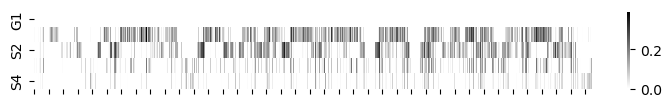

In [31]:
#Plot the raw values of log2 Partage data

import matplotlib.pyplot as plt
plt.figure(figsize=(9,1))
plt.xticks(visible=False)
#smoothdf.index  = ['G1', 'S1', 'S2', 'S3', 'S4']
ax=sns.heatmap(raw_all[['G1', 'S1', 'S2', 'S3', 'S4']].reset_index(drop=True).iloc[0:1000].T, cmap='gray_r')
ax.set(xlabel=None)

In [47]:
summeddf = summeddf.fillna(0).drop('sum', axis=1).T

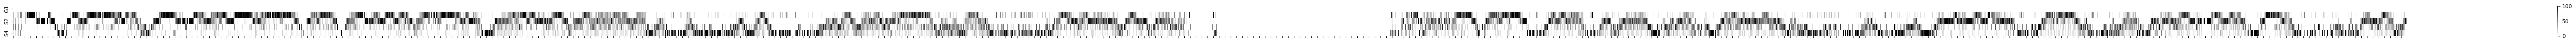

In [51]:
#Plot with scaled data

import matplotlib.pyplot as plt
plt.figure(figsize=(100,1))
plt.xticks(visible=False)
smoothdf.index  = ['G1','S1', 'S2', 'S3', 'S4']
ax=sns.heatmap(summeddf.T.iloc[0:5000].T, cmap='gray_r')
ax.set(xlabel=None)
plt.savefig('long_fig.pdf')

In [41]:
bedgraph_df = pd.DataFrame()
for i in range(1,23):
    summeddf = chr_dict_log2[i]
    
    summeddf['sum'] = summeddf['G1']+ summeddf['S1']+ summeddf['S2']+ summeddf['S3']+ summeddf['S4']
    summeddf['G1'] = summeddf['G1']/summeddf['sum']*100
    summeddf['S1'] = summeddf['S1']/summeddf['sum']*100
    summeddf['S2']= summeddf['S2']/summeddf['sum']*100
    summeddf['S3']= summeddf['S3']/summeddf['sum']*100
    summeddf['S4']= summeddf['S4']/summeddf['sum']*100
    
    summeddf=summeddf.drop('G1', axis=1)
    summeddf=summeddf.drop('sum', axis=1)
    summeddf = summeddf.fillna(0)
    bedgraph_df = pd.concat([bedgraph_df, summeddf], axis=0)

In [63]:
bedgraph_df = bedgraph_df.reset_index()

In [64]:
bedgraph_df

,index,chr,start,end,S1,S2,S3,S4
0,0,chr1,0,50000,14.608004,36.973869,34.710434,13.707693
1,1,chr1,50000,100000,42.759419,0.000000,57.240581,0.000000
2,2,chr1,100000,150000,12.594495,80.909522,0.000000,6.495982
3,3,chr1,150000,200000,0.000000,0.000000,0.000000,0.000000
4,4,chr1,200000,250000,0.000000,0.000000,100.000000,0.000000
...,...,...,...,...,...,...,...,...
57504,57504,chr22,50600000,50650000,100.000000,0.000000,0.000000,0.000000
57505,57505,chr22,50650000,50700000,100.000000,0.000000,0.000000,0.000000
57506,57506,chr22,50700000,50750000,0.000000,0.000000,0.000000,0.000000
57507,57507,chr22,50750000,50800000,70.022105,29.977895,0.000000,0.000000


In [65]:
#create partage bedgraph

bedgraph_df[['chr', 'start', 'end', 'S1']].to_csv('S1_1.bedgraph', sep='\t', index=False, header=False)
bedgraph_df[['chr', 'start', 'end', 'S2']].to_csv('S2_1.bedgraph', sep='\t', index=False, header=False)
bedgraph_df[['chr', 'start', 'end', 'S3']].to_csv('S3_1.bedgraph', sep='\t', index=False, header=False)
bedgraph_df[['chr', 'start', 'end', 'S4']].to_csv('S4_1.bedgraph', sep='\t', index=False, header=False)
#bedgraph_df[['chr', 'start', 'end', 'G2']].to_csv('G2_3.bg', sep='\t', index=False, header=False)
bedgraph_df.to_csv('partage_samples_1.txt', sep='\t', index=False, header=False)